In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [4]:
# Step 2: Load the dataset
data = pd.read_csv('insurance.csv')

In [5]:
# Step 3: Initial Data Understanding
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print("\nFirst five rows of the dataset:")
print(data.head())


First five rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<Figure size 1400x800 with 0 Axes>

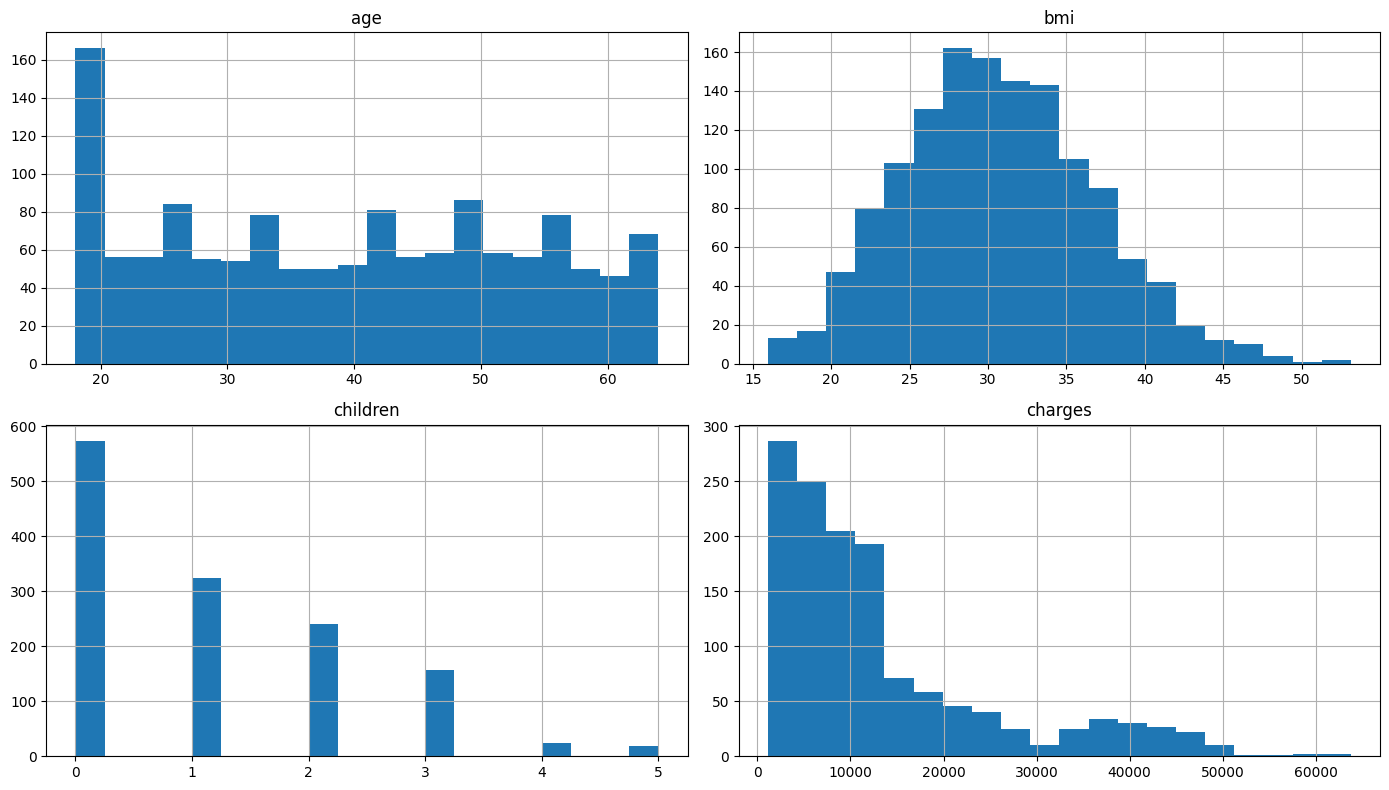

In [7]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(14, 8))
data[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(14, 8), layout=(2, 2))
plt.tight_layout()
plt.show()

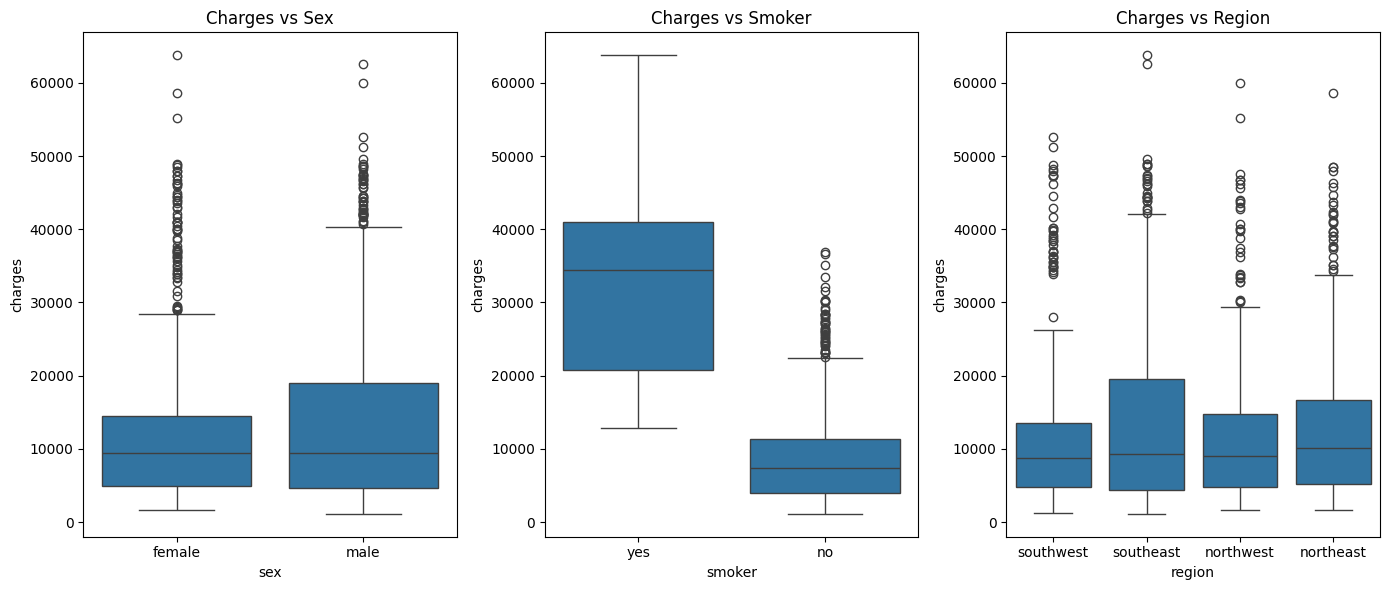

In [8]:
# Boxplots to check categorical variable impact on charges
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges vs Sex')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges vs Smoker')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges vs Region')

plt.tight_layout()
plt.show()

In [9]:
#Step 5: Data Preparation (Encoding and Scaling)
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Separate features and target
X = data.drop(columns=['charges'])
y = data['charges']

# Fit and transform the data
X_prepared = preprocessor.fit_transform(X)

# Convert transformed data back into a DataFrame for feature visibility
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols + list(encoded_columns)
X_prepared_df = pd.DataFrame(X_prepared, columns=all_columns)

print("\nPrepared Data Head:")
print(X_prepared_df.head())


Prepared Data Head:
        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614       0.0         1.0               0.0   
1 -1.509965  0.509621 -0.078767       1.0         0.0               0.0   
2 -0.797954  0.383307  1.580926       1.0         0.0               0.0   
3 -0.441948 -1.305531 -0.908614       1.0         0.0               1.0   
4 -0.513149 -0.292556 -0.908614       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0  


In [10]:
# Step 6: Modeling
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Train models and evaluate
model_performance = {}

In [11]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
model_performance['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

In [12]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
model_performance['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}

In [13]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_performance['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

In [14]:
# Print model performance
print("\nModel Performance:")
print(pd.DataFrame(model_performance))


Model Performance:
     Linear Regression  Decision Tree  Random Forest
MAE       4.181194e+03   3.074866e+03   2.545215e+03
MSE       3.359692e+07   4.015399e+07   2.086622e+07
R2        7.835930e-01   7.413571e-01   8.655949e-01


In [15]:
# Step 7: Final Model Training on Full Data
rf_final_model = RandomForestRegressor(random_state=42)
rf_final_model.fit(X_prepared, y)
y_pred_final = rf_final_model.predict(X_prepared)

# Final Evaluation
final_mae = mean_absolute_error(y, y_pred_final)
final_mse = mean_squared_error(y, y_pred_final)
final_r2 = r2_score(y, y_pred_final)

print("\nFinal Model Performance (Random Forest):")
print(f"MAE: {final_mae}")
print(f"MSE: {final_mse}")
print(f"R²: {final_r2}")


Final Model Performance (Random Forest):
MAE: 1026.9948091877427
MSE: 3392231.7943293555
R²: 0.9768515916854981


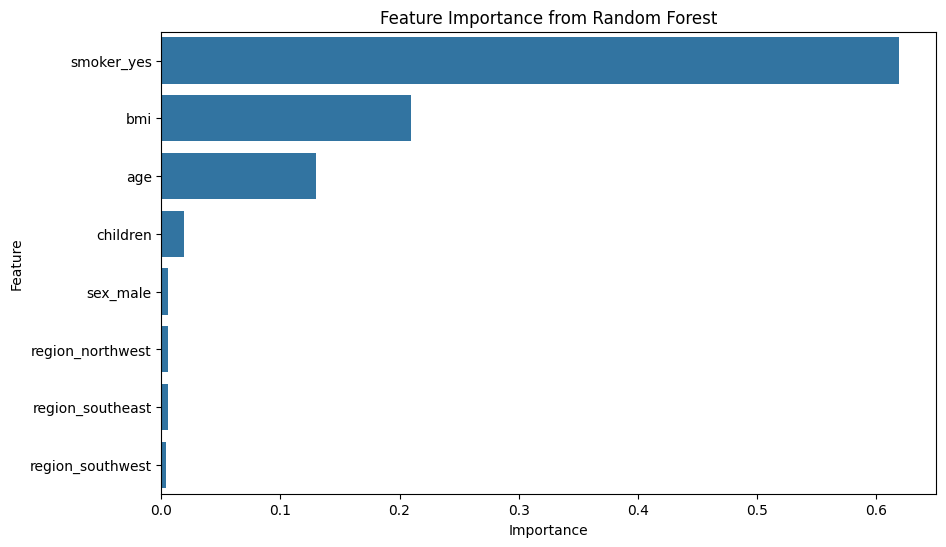

In [16]:
# Step 8: Feature Importance Analysis
feature_importances = rf_final_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()
